## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/AMZN.csv')
df.head()

,Date,Close
0,7/2/2018,1713.780029
1,7/3/2018,1693.959961
2,7/5/2018,1699.729980
3,7/6/2018,1710.630005
4,7/9/2018,1739.020020


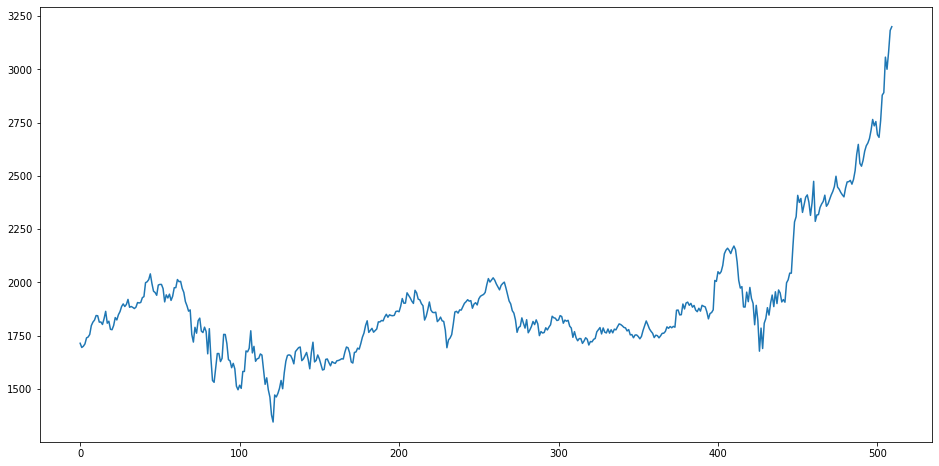

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,1713.780029
1,2018-07-03,1693.959961
2,2018-07-05,1699.729980
3,2018-07-06,1710.630005
4,2018-07-09,1739.020020


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.2616 - accuracy: 0.0043
Epoch 2/5
8/8 - 1s - loss: 0.0350 - accuracy: 0.0086
Epoch 3/5
8/8 - 1s - loss: 0.0169 - accuracy: 0.0086
Epoch 4/5
8/8 - 1s - loss: 0.0124 - accuracy: 0.0086
Epoch 5/5
8/8 - 1s - loss: 0.0112 - accuracy: 0.0086


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss, model_accuracy = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.0144 - accuracy: 0.0000e+00
Loss: 0.0144145293161273, Accuracy: 0.0


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[1765.8867],
       [1881.1802],
       [1666.0513],
       [1640.7384],
       [1739.3129],
       [1601.207 ],
       [1675.8639],
       [1816.942 ],
       [1792.6199],
       [1639.163 ],
       [1614.2059],
       [1841.8319],
       [1761.7648],
       [1757.8151],
       [1771.6932],
       [1764.1012],
       [1892.3691],
       [1860.0516],
       [1838.4854],
       [1824.4363],
       [1598.3466],
       [1660.4088],
       [1796.0393],
       [1901.1278],
       [1622.8531],
       [1791.5126],
       [1676.2682],
       [1698.479 ],
       [1757.8243],
       [1787.0756],
       [1667.7816],
       [1889.6519],
       [1664.9701],
       [1753.3768],
       [1673.0712],
       [1661.0629],
       [1636.4506],
       [1814.165 ],
       [1869.464 ],
       [1699.8096],
       [1645.1575],
       [1753.3839],
       [1791.5842],
       [1789.2904],
       [1764.3494],
       [1863.8799],
       [1794.8984],
       [1889.5199],
       [1769.2976],
       [1632.3701],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,1765.886719
1,1881.180176
2,1666.051270
3,1640.738403
4,1739.312866
...,...
73,1699.680298
74,1778.909180
75,1744.089600
76,1669.797363


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[1752.790039],
       [1870.319946],
       [1551.47998 ],
       [1377.449951],
       [1598.01001 ],
       [1461.640015],
       [1588.219971],
       [1911.300049],
       [1822.550049],
       [1690.170044],
       [1674.560059],
       [1859.680054],
       [1800.800049],
       [1769.209961],
       [1753.109985],
       [1745.530029],
       [1952.76001 ],
       [1889.97998 ],
       [1815.47998 ],
       [1816.319946],
       [1640.560059],
       [1641.089966],
       [1844.869995],
       [2000.810059],
       [1683.780029],
       [1754.359985],
       [1673.099976],
       [1636.849976],
       [1779.98999 ],
       [1739.839966],
       [1692.430054],
       [2004.359985],
       [1670.569946],
       [1705.51001 ],
       [1591.      ],
       [1631.560059],
       [1673.569946],
       [1764.030029],
       [2001.069946],
       [1797.27002 ],
       [1581.329956],
       [1530.420044],
       [1869.670044],
       [1839.339966],
       [1769.959961],
       [20

In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,1765.886719,1752.790039
1,1881.180176,1870.319946
2,1666.051270,1551.479980
3,1640.738403,1377.449951
4,1739.312866,1598.010010
...,...,...
73,1699.680298,1755.489990
74,1778.909180,1642.810059
75,1744.089600,1731.920044
76,1669.797363,1520.910034


In [16]:
lstm_model.save("../models/AMZN_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[1760.6273],
       [1761.9749],
       [1763.4697],
       [1764.9286],
       [1768.2648],
       [1772.6577],
       [1777.4734],
       [1782.1208],
       [1787.7115],
       [1793.2513],
       [1799.4185],
       [1805.544 ],
       [1811.3274],
       [1816.777 ],
       [1821.3206],
       [1825.4069],
       [1828.4048],
       [1830.4211],
       [1832.007 ],
       [1833.1707],
       [1834.5057],
       [1835.5159],
       [1836.4539],
       [1836.7473],
       [1835.7723],
       [1834.7205],
       [1833.4097],
       [1832.5991],
       [1835.1403],
       [1839.6237],
       [1846.8344],
       [1854.739 ],
       [1863.6117],
       [1873.2101],
       [1884.2937],
       [1896.281 ],
       [1908.5199],
       [1920.216 ],
       [1930.6093],
       [1940.3217],
       [1949.6304],
       [1957.7058],
       [1963.6039],
       [1965.941 ],
       [1964.9612],
       [1962.0126],
       [1955.4333],
       [1947.0957],
       [1939.0752],
       [1930.6865],


In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,1792.280029
371,2019-12-20,1786.500000
372,2019-12-23,1793.000000
373,2019-12-24,1789.209961
374,2019-12-26,1868.770020
...,...,...
505,2020-07-06,3057.040039
506,2020-07-07,3000.120117
507,2020-07-08,3081.110107
508,2020-07-09,3182.629883


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,1792.280029,1760.627319
371,2019-12-20,1786.500000,1761.974854
372,2019-12-23,1793.000000,1763.469727
373,2019-12-24,1789.209961,1764.928589
374,2019-12-26,1868.770020,1768.264771
...,...,...,...
505,2020-07-06,3057.040039,2237.982178
506,2020-07-07,3000.120117,2247.266602
507,2020-07-08,3081.110107,2258.013916
508,2020-07-09,3182.629883,2269.968506


In [24]:
forecast_data.to_csv("../data/predictions/AMZN.csv")

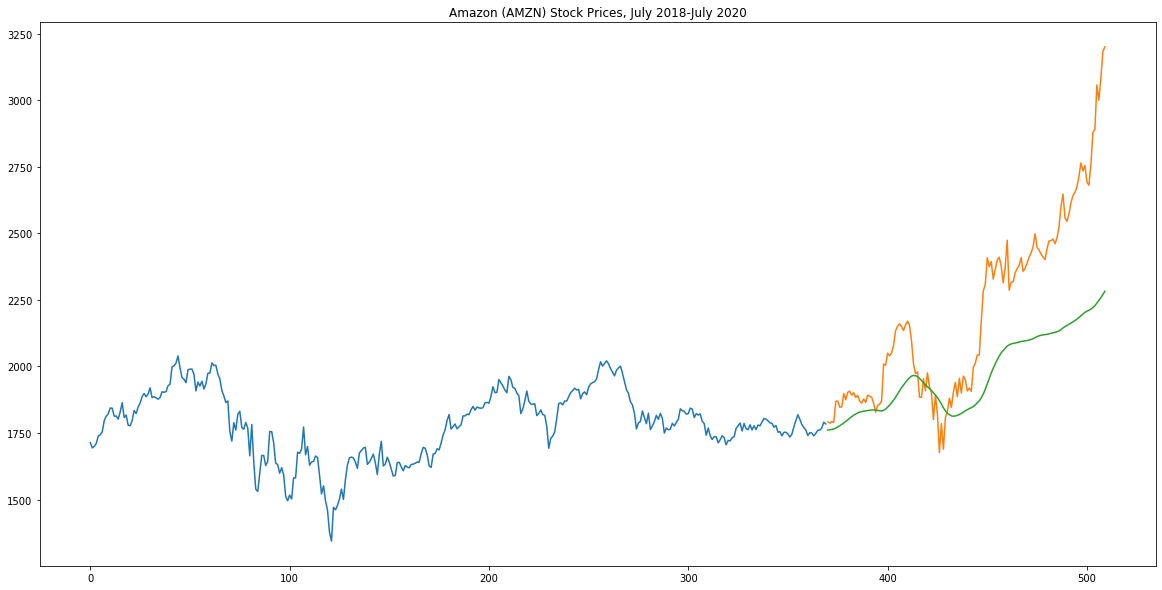

In [26]:
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Amazon (AMZN) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/AMZN.png")